In [8]:
#import in the required library
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [10]:
#define the size
SIZE = 128

In [11]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)
        

airplanes
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane0.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane1.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane10.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane11.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane12.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane13.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane14.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane15.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane16.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane17.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane18.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Train\airplanes\airplane19.jpg
C:/Users/Admin/Desktop/cfiar-10 data/Data_Sc

In [12]:
train_images

[array([[[165, 141, 123],
         [165, 141, 123],
         [166, 142, 124],
         ...,
         [174, 151, 135],
         [172, 151, 134],
         [171, 151, 134]],
 
        [[165, 141, 123],
         [165, 141, 123],
         [166, 142, 124],
         ...,
         [174, 151, 135],
         [173, 151, 135],
         [172, 152, 135]],
 
        [[165, 141, 123],
         [165, 141, 123],
         [166, 142, 124],
         ...,
         [174, 151, 135],
         [173, 152, 135],
         [172, 152, 135]],
 
        ...,
 
        [[161, 131, 104],
         [161, 131, 104],
         [161, 131, 104],
         ...,
         [165, 140, 120],
         [167, 141, 121],
         [170, 140, 121]],
 
        [[161, 131, 104],
         [161, 131, 104],
         [161, 131, 104],
         ...,
         [165, 141, 121],
         [168, 142, 122],
         [171, 141, 122]],
 
        [[161, 131, 104],
         [161, 131, 104],
         [161, 131, 104],
         ...,
         [166, 142, 122],
  

In [13]:
train_labels

['airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'airplanes',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'automobiles',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'birds',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'deers',
 'deers',


In [16]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [18]:
print(train_labels)

['airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'birds' 'birds' 'birds' 'birds' 'birds'
 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds'
 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'cats' 'cats' 'cats'
 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats'
 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'deers' 'deers' 'deers'
 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers'
 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'dogs'

In [19]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/Admin/Desktop/cfiar-10 data/Data_Scrap_Test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [20]:
test_images

array([[[[ 72, 154, 231],
         [ 77, 159, 235],
         [ 82, 165, 240],
         ...,
         [ 69, 158, 232],
         [ 64, 153, 227],
         [ 61, 150, 224]],

        [[ 57, 139, 216],
         [ 60, 143, 218],
         [ 64, 146, 220],
         ...,
         [ 68, 157, 231],
         [ 65, 154, 228],
         [ 64, 153, 227]],

        [[ 51, 133, 208],
         [ 52, 134, 209],
         [ 55, 135, 209],
         ...,
         [ 71, 160, 234],
         [ 70, 159, 233],
         [ 70, 159, 233]],

        ...,

        [[  3,   1,   1],
         [  4,   2,   2],
         [  6,   4,   4],
         ...,
         [  6,   4,   3],
         [  9,   7,   5],
         [ 10,   9,   7]],

        [[  2,   0,   0],
         [  3,   1,   1],
         [  5,   3,   3],
         ...,
         [  6,   4,   3],
         [ 14,  12,  10],
         [ 19,  18,  15]],

        [[  2,   0,   0],
         [  2,   0,   0],
         [  4,   2,   2],
         ...,
         [  6,   4,   3],
        

In [22]:
print(test_labels)

['airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds'
 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds'
 'birds' 'birds' 'birds' 'birds' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats'
 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats'
 'cats' 'cats' 'cats' 'cats' 'deers' 'deers' 'deers' 'deers' 'deers'
 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers'
 'deers' 'deers' 'deers' 'deers' 'deers' 'deers' 'dogs' 'dogs' 'dog

In [23]:
#Encode labels from text (folder names) to integers.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)


In [24]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here

x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [26]:
print(x_train.shape)

(200, 128, 128, 3)


In [27]:
print(y_train.shape)

(200,)


In [28]:
print(x_test.shape)

(199, 128, 128, 3)


In [29]:
print(y_test.shape)

(199,)


In [30]:
# Normalize pixel values to between 0 and 1

x_train, x_test = x_train / 255.0, x_test / 255.0

In [31]:
print(x_train)

[[[[0.64705882 0.55294118 0.48235294]
   [0.64705882 0.55294118 0.48235294]
   [0.65098039 0.55686275 0.48627451]
   ...
   [0.68235294 0.59215686 0.52941176]
   [0.6745098  0.59215686 0.5254902 ]
   [0.67058824 0.59215686 0.5254902 ]]

  [[0.64705882 0.55294118 0.48235294]
   [0.64705882 0.55294118 0.48235294]
   [0.65098039 0.55686275 0.48627451]
   ...
   [0.68235294 0.59215686 0.52941176]
   [0.67843137 0.59215686 0.52941176]
   [0.6745098  0.59607843 0.52941176]]

  [[0.64705882 0.55294118 0.48235294]
   [0.64705882 0.55294118 0.48235294]
   [0.65098039 0.55686275 0.48627451]
   ...
   [0.68235294 0.59215686 0.52941176]
   [0.67843137 0.59607843 0.52941176]
   [0.6745098  0.59607843 0.52941176]]

  ...

  [[0.63137255 0.51372549 0.40784314]
   [0.63137255 0.51372549 0.40784314]
   [0.63137255 0.51372549 0.40784314]
   ...
   [0.64705882 0.54901961 0.47058824]
   [0.65490196 0.55294118 0.4745098 ]
   [0.66666667 0.54901961 0.4745098 ]]

  [[0.63137255 0.51372549 0.40784314]
   [0.6

In [32]:
print(x_test)

[[[[0.28235294 0.60392157 0.90588235]
   [0.30196078 0.62352941 0.92156863]
   [0.32156863 0.64705882 0.94117647]
   ...
   [0.27058824 0.61960784 0.90980392]
   [0.25098039 0.6        0.89019608]
   [0.23921569 0.58823529 0.87843137]]

  [[0.22352941 0.54509804 0.84705882]
   [0.23529412 0.56078431 0.85490196]
   [0.25098039 0.57254902 0.8627451 ]
   ...
   [0.26666667 0.61568627 0.90588235]
   [0.25490196 0.60392157 0.89411765]
   [0.25098039 0.6        0.89019608]]

  [[0.2        0.52156863 0.81568627]
   [0.20392157 0.5254902  0.81960784]
   [0.21568627 0.52941176 0.81960784]
   ...
   [0.27843137 0.62745098 0.91764706]
   [0.2745098  0.62352941 0.91372549]
   [0.2745098  0.62352941 0.91372549]]

  ...

  [[0.01176471 0.00392157 0.00392157]
   [0.01568627 0.00784314 0.00784314]
   [0.02352941 0.01568627 0.01568627]
   ...
   [0.02352941 0.01568627 0.01176471]
   [0.03529412 0.02745098 0.01960784]
   [0.03921569 0.03529412 0.02745098]]

  [[0.00784314 0.         0.        ]
   [0.0

In [33]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:,:]
        img = input_img
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
        #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        #edge_sobel = sobel(img)
        #edge_sobel1 = edge_sobel.reshape(-1)
        #df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [34]:
#Extract features from training images
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [35]:
#Reshape to a vector for Random Forest / SVM training

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features


In [36]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [37]:
 # Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [38]:
#Predict on Test data
#Extract features from test data and reshape, just like training data

test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [39]:
#Predict on test

test_prediction = RF_model.predict(test_for_RF)

#Inverse le transform to get original label back. 

test_prediction = le.inverse_transform(test_prediction)


In [40]:
print(test_prediction)

['airplanes' 'airplanes' 'ships' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'ships' 'airplanes'
 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes' 'airplanes'
 'airplanes' 'automobiles' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'automobiles' 'ships'
 'automobiles' 'horses' 'automobiles' 'automobiles' 'automobiles'
 'automobiles' 'automobiles' 'automobiles' 'dogs' 'horses' 'deers' 'birds'
 'cats' 'birds' 'birds' 'birds' 'birds' 'birds' 'birds' 'dogs' 'cats'
 'birds' 'deers' 'airplanes' 'birds' 'birds' 'birds' 'birds' 'birds'
 'birds' 'birds' 'cats' 'cats' 'cats' 'cats' 'cats' 'trucks' 'cats' 'cats'
 'dogs' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats' 'cats'
 'cats' 'horses' 'deers' 'deers' 'horses' 'deers' 'deers' 'deers' 'deers'
 'deers' 'deers' 'cats' 'deers' 'deers' 'deers' 'deers' 'deers' 'deers'
 'deers' 'deers' 'dogs' 'deers' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs'
 'dogs' '

In [41]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.8190954773869347


In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

In [43]:
print(cm)

[[17  0  0  0  0  0  0  0  2  0]
 [ 0 15  0  0  1  1  0  2  1  0]
 [ 1  0 15  2  1  1  0  0  0  0]
 [ 0  0  0 17  0  1  0  1  0  1]
 [ 0  0  0  1 17  1  0  1  0  0]
 [ 1  0  0  0  0 19  0  0  0  0]
 [ 0  0  1  1  0  1 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  2]
 [ 3  1  0  0  0  0  0  3 13  0]
 [ 0  1  1  0  0  0  0  0  2 16]]


<AxesSubplot:>

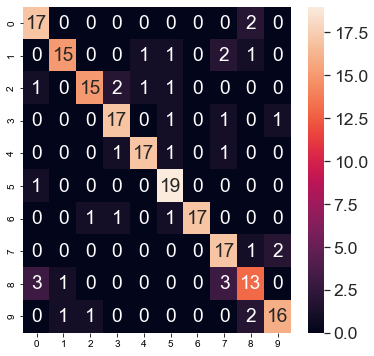

In [44]:
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

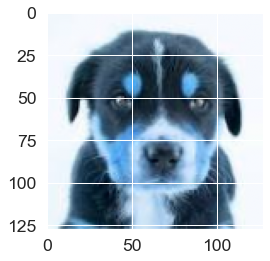

In [60]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

In [61]:
#Extract features and reshape to right dimensions

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


In [62]:
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['dogs']
The actual label for this image is:  dogs


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [63]:
###############################################################################3

In [64]:
#Can also use SVM but RF is faster and may be more accurate.
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_RF, y_train)

SVC(decision_function_shape='ovo')

In [66]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Accuracy =  0.8190954773869347


<AxesSubplot:>

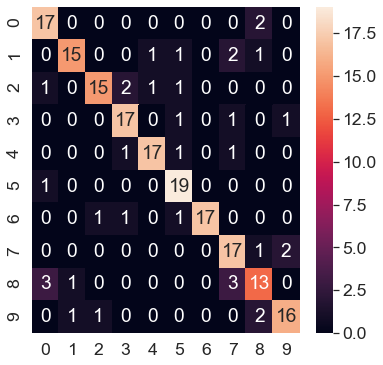

In [67]:

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))


#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)



Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['ships']
The actual label for this image is:  ships


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


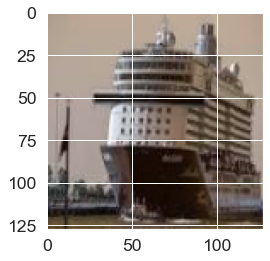

In [71]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])